# PCA Analysis
## Using the data on electricity production in Denmark
Figure out the largest contributing factors to CO2 emissions using PCA

In [1]:
import pandas as pd
from pandas import DataFrame


In [2]:
h_start = 0    # start of header names, inclusive
h_end = 20     # end of header names, exclusive
d_start = 22   # start of data values,
dates = [0,]   # Column zero is a date and Pandas must interpret it as a date

In [3]:
with open("20161208_onlinedata.csv", encoding="latin1") as f:
    data_fields = f.readlines()[h_start:h_end]
    f.seek(0,0)
    data_values = pd.read_csv(f, skiprows=d_start-1, sep=';', infer_datetime_format=True, parse_dates=dates)

In [4]:
# Clean leading and trailing spaces, tabs, newlines
# split on first space only, and then only take the text field -> ['first header name', 'second header name']
headers = [d.strip() for d in data_fields]
headers = [h.split(" ", maxsplit=1)[1] for h in headers] 

In [5]:
# Insert the name of the time column
headers.insert(0, "Dato og tid")

In [6]:
# Drop the last empty column
data_values = data_values.drop('Unnamed: 21', axis=1)  # We drop column with name 21, on the 1st axis (columns)

In [7]:
# Make a new final object
df = data_values.copy(deep=True)

# Set the header names
df.columns = headers

# Set the Date to be the index
df = df.set_index(df.columns[0])

## We now have a final dataset
Now, begin to make it ready for PCA

In [8]:
# Create a df to do PCA on
df2 = df.copy(deep=True)

In [9]:
# Pop out the CO2 column and save it
CO2 = df2.pop('CO2 udledning')

In [10]:
# Pop off and discard the two unusable columns
df2.pop('Vindhastighed i Malling');
df2.pop('Temperatur i Malling');

### Import PCA model

In [11]:
import numpy as np
from sklearn.decomposition import PCA

In [12]:
pca_model = PCA(n_components=1)

Attempt to make a model with just one component, i.e. make 1 new variable by combining the 20 old variables into 1 new variable

In [13]:
pca_model.fit(df2)

PCA(n_components=1)

Show how many percent of total variance in the data can be explained with just the 1 component

In [14]:
print(pca_model.explained_variance_ratio_)

[0.79257213]


In [15]:
z = zip(pca_model.components_.T[:,0], df2.columns.T)
list(z)

[(0.12597996986359525, 'Centrale kraftværker DK1'),
 (0.012639045915224245, 'Centrale kraftværker DK2'),
 (0.059873862966092824, 'Decentrale kraftværker DK1'),
 (0.01481577297282811, 'Decentrale kraftværker DK2'),
 (-0.44167102846258777, 'Vindmøller DK1'),
 (-0.07026999074319044, 'Vindmøller DK2'),
 (0.6743662578385146, 'Udveksling Jylland-Norge'),
 (-0.06515162528706121, 'Udveksling Jylland-Sverige'),
 (-0.15354756286331547, 'Udveksling Jylland-Tyskland'),
 (0.3009366106917083, 'Udveksling Sjælland-Sverige'),
 (-0.07732449721545338, 'Udveksling Sjælland-Tyskland'),
 (0.001093797833095818, 'Udveksling Bornholm-Sverige'),
 (0.009799592537681373, 'Udveksling Fyn-Sjaelland'),
 (-0.06904898350365901, 'Havmøller DK'),
 (-0.4428941383377205, 'Landmøller DK'),
 (-0.00042083450054026346, 'Solceller DK1'),
 (-3.396703926453231e-05, 'Solceller DK2')]

Perform the transformation, i.e. make the new variable by applying weights to each column and taking sum

In [16]:
x = pca_model.fit(df2).transform(df2)

Make a small new dataset with the CO2 data and the new PCA variable

In [17]:
cmp = CO2.to_frame()  # Make the Series object into a DataFrame
cmp["PCA"] = x[:,0]   # Make a new column with the PCA variable

In [18]:
cmp

,CO2 udledning,PCA
Dato og tid,,
2016-12-08 00:00:00,190,-1771.556285
2016-12-08 00:05:00,184,-1815.747534
2016-12-08 00:10:00,180,-1823.303024
2016-12-08 00:15:00,175,-1813.974267
2016-12-08 00:20:00,170,-1833.460103
...,...,...
2016-12-08 23:35:00,292,33.259697
2016-12-08 23:40:00,294,46.548923
2016-12-08 23:45:00,297,66.868377


### Look at the results
Compare the CO2 value to the 1 new variable.
We plot on different axes, as the two series are not equally scaled

Use seaborn to make it look nicer

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

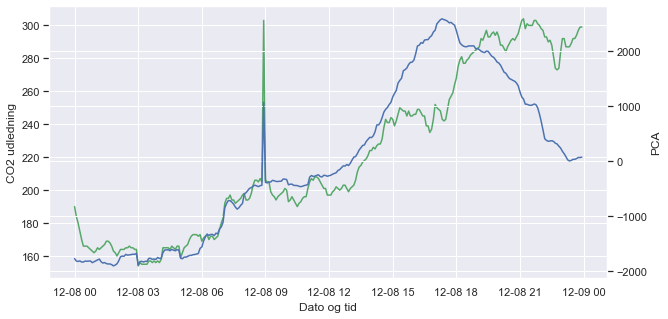

In [20]:
plt.figure(figsize=(10,5))
sns.lineplot(data=cmp['CO2 udledning'], color="g");
ax2 = plt.twinx()
sns.lineplot(data=cmp['PCA'], color="b", ax=ax2);

This shows how the new single variable explains most of the variation in CO2 emissions.